In [260]:
import numpy as np
import plotly.graph_objects as go

In [22]:
%pip install --user -U git+https://github.com/jdtatz/libnirs.git

  Cloning https://github.com/jdtatz/libnirs.git to /tmp/pip-req-build-61igak8q
  Running command git clone --filter=blob:none --quiet https://github.com/jdtatz/libnirs.git /tmp/pip-req-build-61igak8q
  Resolved https://github.com/jdtatz/libnirs.git to commit fda18acb2ea35bdda81c732e0aa496370514ce84
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from libnirs import *

In [25]:
pwr_rd_h = [21.49,  6.07, 3.98, 1.38, 0.2246]; pwr_rd_h = 10*np.log10(pwr_rd_h)
pwr_rd_a = [24.21, 9.55, 3.19, 1.797, 0.2981, 0.0782]; pwr_rd_a = 10*np.log10(pwr_rd_a)
dist_cm_h = np.asarray([4.7505, 7.45, 11.9505, 15.5505, 22.6495]); dist_cm_h = dist_cm_h/10
dist_cm_a = np.asarray([4.7505, 7.45, 11.9505, 15.5505, 22.6495,28.95]); dist_cm_a = dist_cm_a/10

In [25]:
def regression(distance, power):
    A = np.vstack([distance, np.ones(len(distance))]).T
    m, c = np.linalg.lstsq(A,power, rcond=None)[0]
    y = (m*distance) + c
    
    return y, m, c


In [26]:
y_h, m_h, c_h = regression(dist_cm_h, pwr_rd_h)
y_a, m_a, c_a = regression(dist_cm_a, pwr_rd_a)

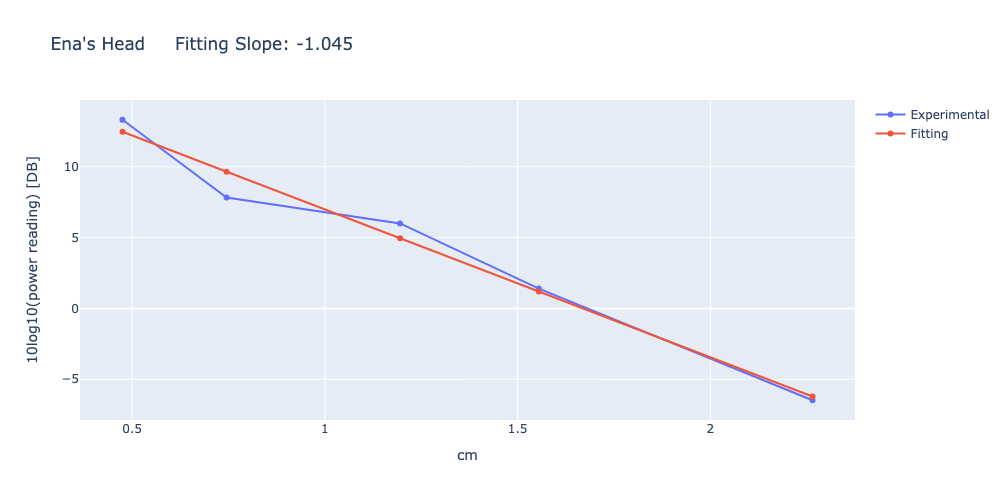

In [27]:
pwr_dist = go.Figure()
pwr_dist.add_trace(go.Scatter(x = dist_cm_h, y =pwr_rd_h, name = 'Experimental',showlegend=True))
pwr_dist.add_trace(go.Scatter(x = dist_cm_h, y =y_h, name = 'Fitting',showlegend=True))
pwr_dist.update_layout(autosize=False,width=1500,height=500,title = "Ena's Head     Fitting Slope: "+str(np.round(m_h/10,3)), yaxis_title= '10log10(power reading) [DB]', xaxis_title = 'cm')

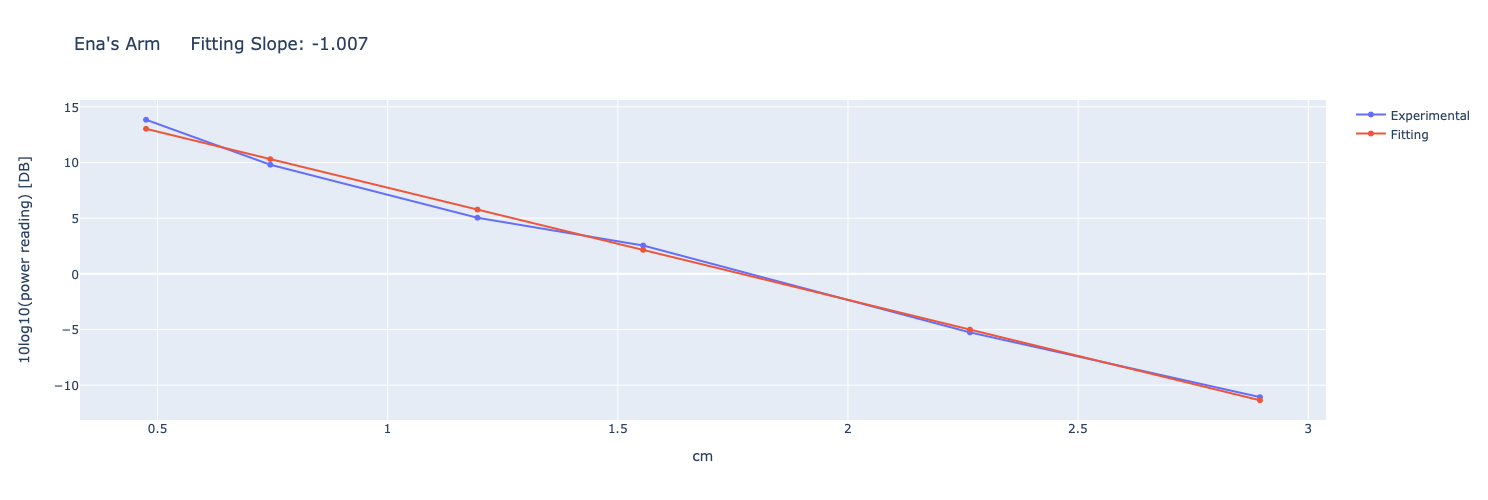

In [28]:
pwr_dist = go.Figure()
pwr_dist.add_trace(go.Scatter(x = dist_cm_a, y =pwr_rd_a, name = 'Experimental',showlegend=True))
pwr_dist.add_trace(go.Scatter(x = dist_cm_a, y =y_a, name = 'Fitting',showlegend=True))
pwr_dist.update_layout(autosize=False,width=1500,height=500,title = "Ena's Arm     Fitting Slope: "+str(np.round(m_a/10,3)), yaxis_title= '10log10(power reading) [DB]', xaxis_title = 'cm')

In [213]:
rho = np.arange(0,2.05,0.0125)

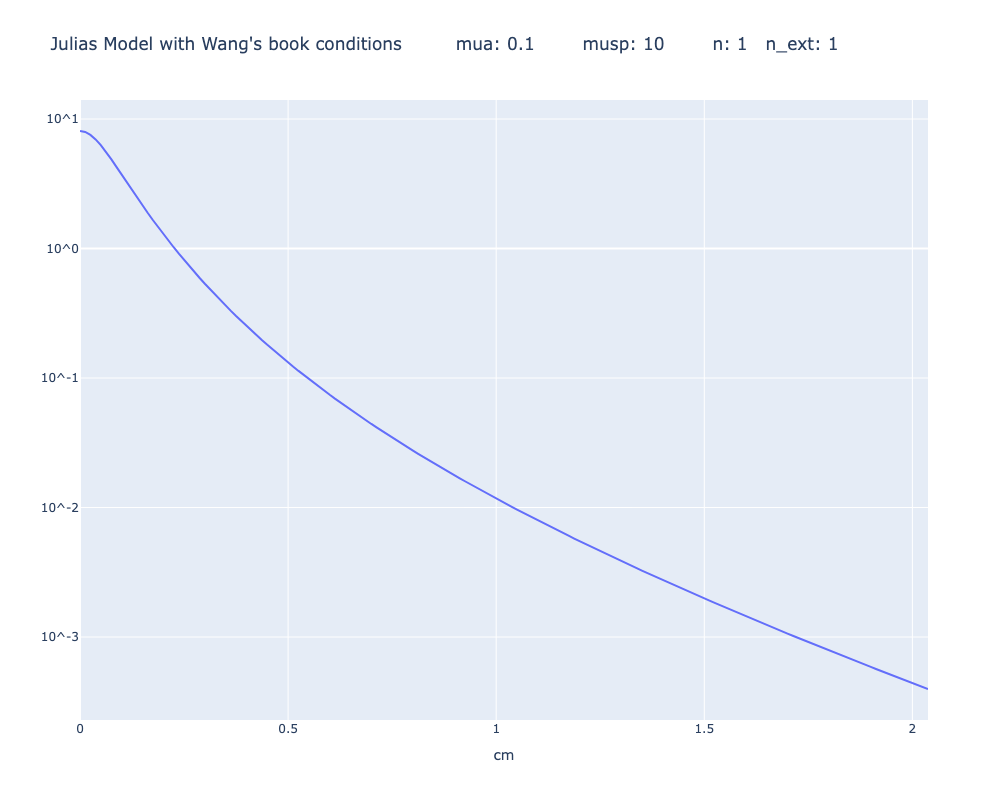

In [215]:
mua = 0.1;  mus = 100; g = 0.9; musp = mus*(1-g); n= 1; n_ext = 1;
result = model_ss(rho, mua, musp, n, n_ext)
result_h = np.abs(result)

reflectance_h = go.Figure()
reflectance_h.add_trace(go.Scatter(x = rho, y =np.log10(result_h), name = 'Results',showlegend=False))
reflectance_h.update_layout(autosize=False,width=1500,height=800,title = "Julias Model with Wang's book conditions         mua: 0.1        musp: 10        n: 1   n_ext: 1 ", yaxis_title= '', xaxis_title = 'cm')
reflectance_h.update_layout(yaxis = dict(tickmode = 'array', tickvals = [1,0,-1,-2,-3], ticktext = ['10^1','10^0','10^-1','10^-2','10^-3']))

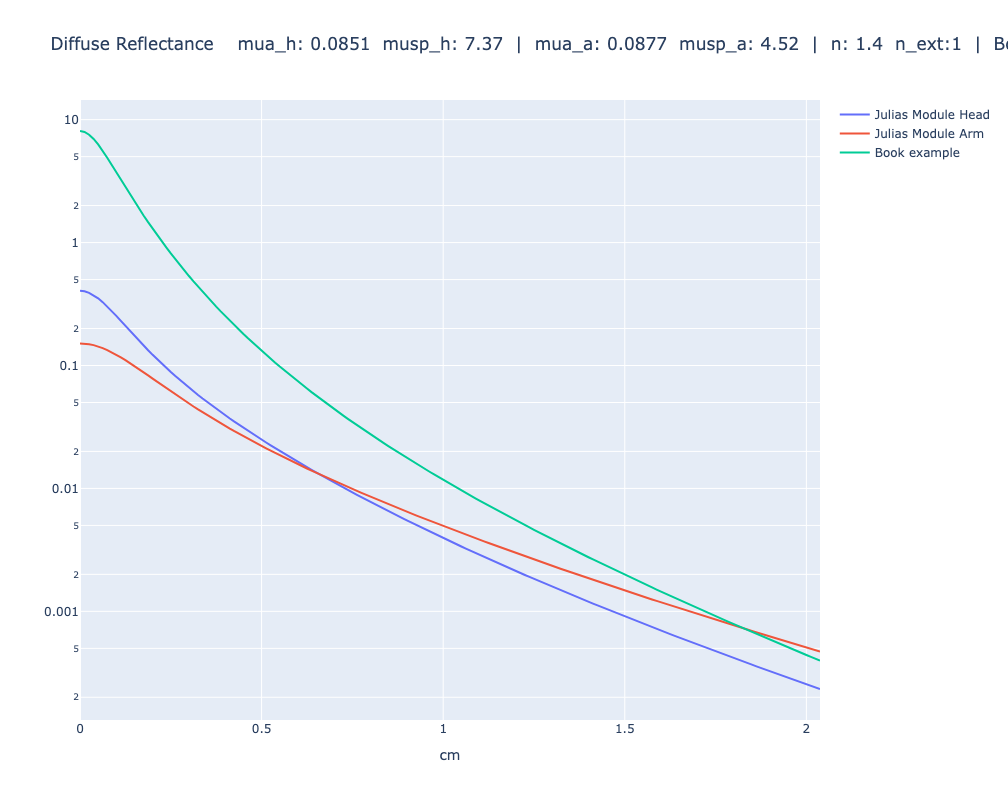

In [240]:
comparing = go.Figure()
rho = np.arange(0,2.05,0.0125)

mua = 0.1;  musp = 10; n= 1; n_ext = 1;
result = model_ss(rho, mua, musp, n, n_ext)
result = np.abs(result)

mua_h = 0.0851;  musp_h = 7.37; n= 1.4; n_ext = 1;
mua_a = 0.0877; musp_a = 4.52; 

result_h = model_ss(rho, mua_h, musp_h, n, n_ext)
result_h = np.abs(result_h)

result_a = model_ss(rho, mua_a, musp_a, n, n_ext)
result_a = np.abs(result_a)


comparing.add_trace(go.Scatter(x = rho, y = (result_h/(2*np.pi)), name = 'Julias Module Head',showlegend=True))
comparing.add_trace(go.Scatter(x = rho, y = (result_a/(2*np.pi)), name = 'Julias Module Arm',showlegend=True))
comparing.add_trace(go.Scatter(x = rho, y = (result), name = 'Book example',showlegend=True))
comparing.update_layout(autosize=False,width=1500,height=800,title = "Diffuse Reflectance    mua_h: "+str(mua_h)+"  musp_h: "+str(musp_h)+"  |  mua_a: "+str(mua_a)+"  musp_a: "+str(musp_a)+"  |  n: "+str(n)+"  n_ext:"+str(n_ext)+"  |  Book's conditions    mua: 0.1    musp: 10    n: 1    n_ext: 1" , yaxis_title= '', xaxis_title = 'cm')
comparing.update_yaxes(type="log")


In [504]:
diff_r_measurements_h = np.asarray([0.03378852, 0.0095438 , 0.00625772, 0.00216976, 0.00035314])

In [506]:
distance_= np.asarray([0.47505, 0.745  , 1.19505, 1.55505, 2.26495])

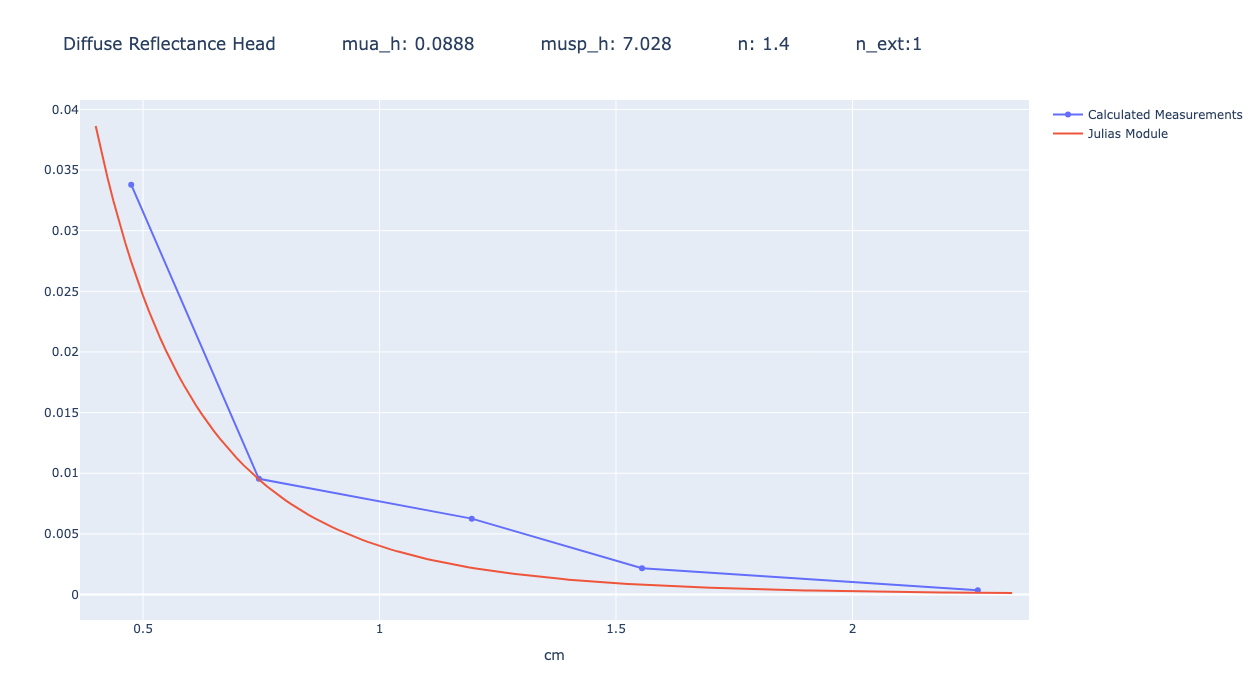

In [508]:
reflectance_h = go.Figure()
rho = np.arange(0.4,2.35,0.0125)

mua_h = 0.0888;  musp_h = 7.028; n= 1.4; n_ext = 1;


result_h = model_ss(rho, mua_h, musp_h, n, n_ext)
result_h = np.abs(result_h)

reflectance_h.add_trace(go.Scatter(x = distance_, y = diff_r_measurements_h, name = 'Calculated Measurements',showlegend=True))
reflectance_h.add_trace(go.Scatter(x = rho, y = (result_h/(2*np.pi)), name = 'Julias Module',showlegend=True))

#reflectance_h.update_yaxes(type="log")

reflectance_h.update_layout(autosize=False,width=1400,height=700,title = "Diffuse Reflectance Head           mua_h: "+str(mua_h)+"           musp_h: "+str(musp_h)+"           n: "+str(n)+"           n_ext:"+str(n_ext) , yaxis_title= '', xaxis_title = 'cm')

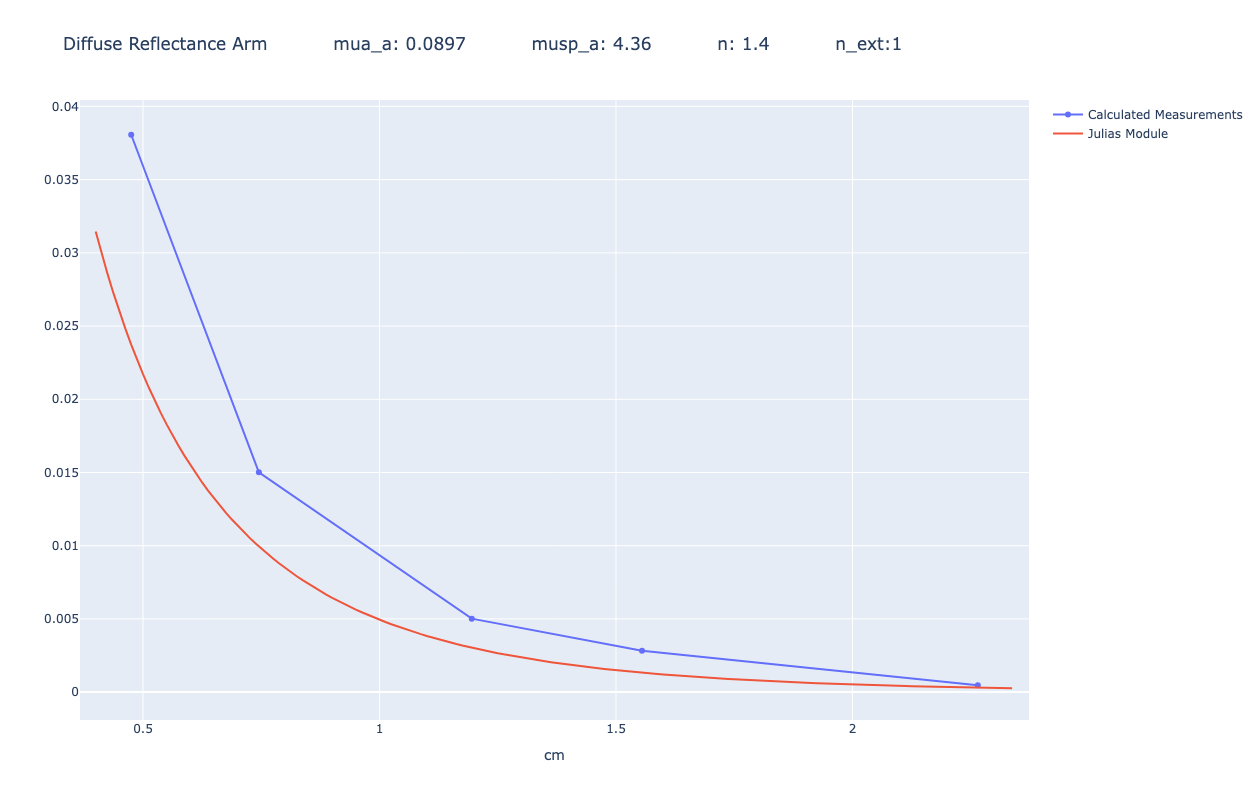

In [339]:
reflectance_h = go.Figure()
rho = np.arange(0.4,2.35,0.0125)

mua_a = 0.0897; musp_a = 4.36; n= 1.4; n_ext = 1;


result_a = model_ss(rho, mua_a, musp_a, n, n_ext)
result_a = np.abs(result_a)

reflectance_h.add_trace(go.Scatter(x = distance_, y = diff_r_measurements_a, name = 'Calculated Measurements',showlegend=True))
reflectance_h.add_trace(go.Scatter(x = rho, y = (result_a/(2*np.pi)), name = 'Julias Module',showlegend=True))

#reflectance_h.update_yaxes(type="log")

reflectance_h.update_layout(autosize=False,width=1500,height=800,title = "Diffuse Reflectance Arm           mua_a: "+str(mua_a)+"           musp_a: "+str(musp_a)+"           n: "+str(n)+"           n_ext:"+str(n_ext) , yaxis_title= '', xaxis_title = 'cm')

In [409]:
# Output power
rho = np.arange(0.4,2.05,(0.0125))

diameter1 = (1000/10000)
na1 = 0.5
area1 = np.pi*(diameter1**2)/4
ster1 = 2*np.pi*(1-np.cos(np.arcsin(na1))) 


diameter2 = (105/10000)
na2 = 0.22
area2 = np.pi*(diameter2**2)/4
ster2 = 2*np.pi*(1-np.cos(np.arcsin(na2))) 

i_input_power = 96.2

f_input_power1 = 40.8
f_input_power2 = 70

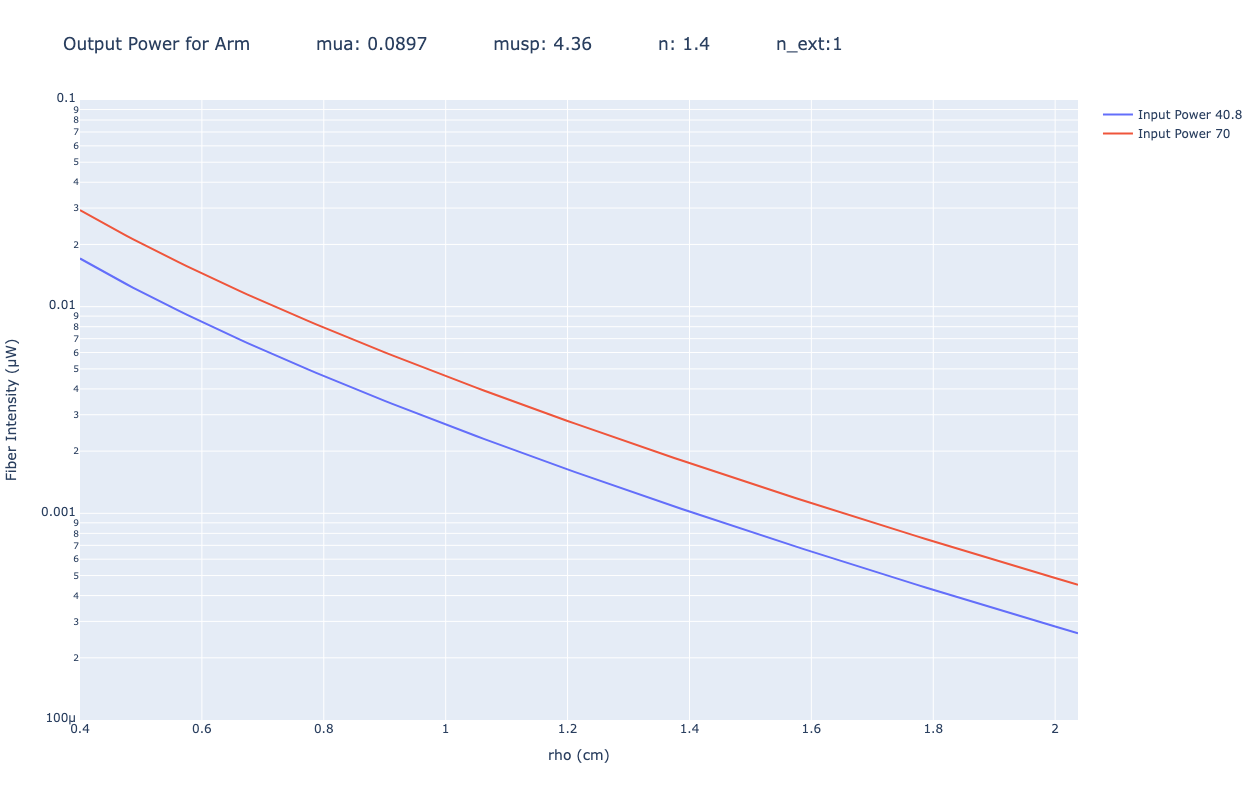

In [469]:
final_power_a = go.Figure()
#power in microwats


final_power_a1_LCA_theoretical = (result_a/(2*np.pi)) * f_input_power1*ster2*area2*1000
final_power_a2_LCA_theoretical = (result_a/(2*np.pi)) * f_input_power2*ster2*area2*1000

final_power_a.add_trace(go.Scatter(x=rho,y=final_power_a1_LCA_theoretical, showlegend=True,name='Input Power '+str(f_input_power1)))
final_power_a.add_trace(go.Scatter(x=rho,y=final_power_a2_LCA_theoretical, showlegend=True, name='Input Power '+str(f_input_power2)))

final_power_a.update_layout(autosize=False,width=1500,height=800,title = "Output Power for Arm           mua: "+str(mua_a)+"           musp: "+str(musp_a)+"           n: "+str(n)+"           n_ext:"+str(n_ext) , 
                            yaxis_title= 'Fiber Intensity (μW)', xaxis_title = 'rho (cm)')
final_power_a.update_yaxes(type="log", range=[-4,-1])


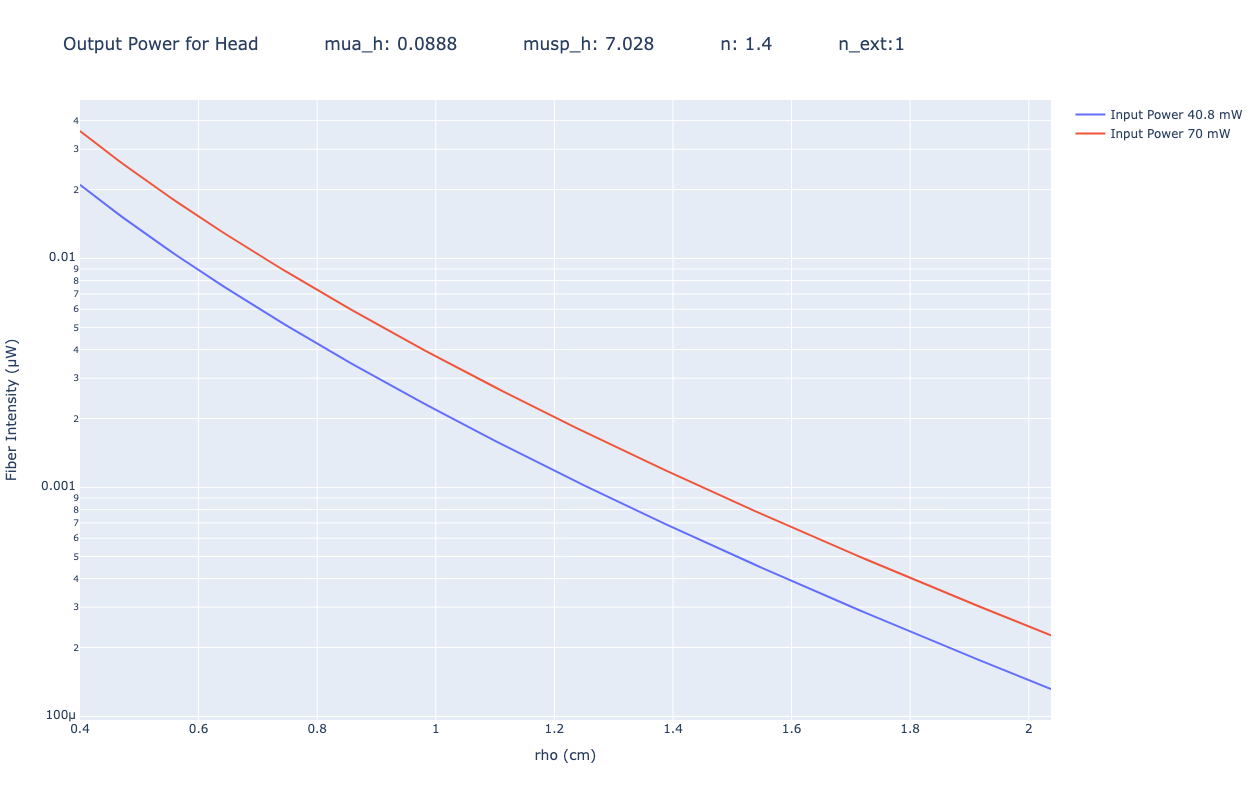

In [468]:
final_power_h = go.Figure()
#power in microwats

final_power_a1_LCA_theoretical = (result_h/(2*np.pi)) * f_input_power1*ster2*area2*1000
final_power_a2_LCA_theoretical = (result_h/(2*np.pi)) * f_input_power2*ster2*area2*1000

final_power_h.add_trace(go.Scatter(x=rho,y=final_power_a1_LCA_theoretical,name ='Input Power '+str(f_input_power1)+' mW'))
final_power_h.add_trace(go.Scatter(x=rho,y=final_power_a2_LCA_theoretical,name ='Input Power '+str(f_input_power2)+' mW'))

final_power_h.update_layout(autosize=False,width=1500,height=800,title = "Output Power for Head           mua_h: "+str(mua_h)+"           musp_h: "+str(musp_h)+"           n: "+str(n)+"           n_ext:"+str(n_ext) , 
                            yaxis_title= 'Fiber Intensity (μW)', xaxis_title = 'rho (cm)')
final_power_h.update_yaxes(type="log")# (range=[-5,-2])


In [471]:
# Measurments with small fiber 

In [472]:
distance_small_f = np.asarray([5, 10, 15, 20, 25, 30, 35])/10

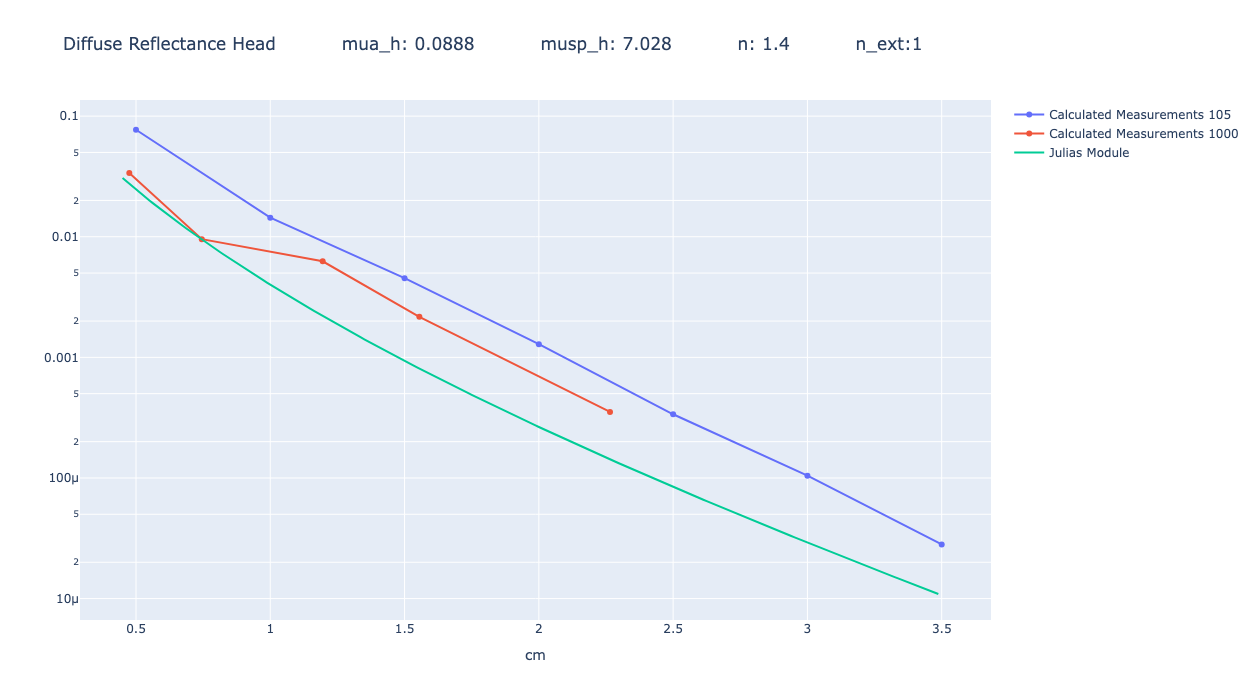

In [512]:
reflectance_h_small = go.Figure()
rho_small = np.arange(0.45,3.5,0.0125)

mua_h = 0.0888;  musp_h = 7.028; n= 1.4; n_ext = 1;

diff_r_measurements_h_small = np.asarray([0.07710945847,0.01440179782,0.00453821292,0.001285157641,0.0003373538808,0.0001044190583,0.0000281128234])


result_h_s = model_ss(rho_small, mua_h, musp_h, n, n_ext)
result_h_s = np.abs(result_h_s)

reflectance_h_small.add_trace(go.Scatter(x = distance_small_f, y = diff_r_measurements_h_small, name = 'Calculated Measurements 105 ',showlegend=True))
reflectance_h_small.add_trace(go.Scatter(x = distance_, y = diff_r_measurements_h, name = 'Calculated Measurements 1000 ',showlegend=True))

reflectance_h_small.add_trace(go.Scatter(x = rho_small, y = (result_h_s/(2*np.pi)), name = 'Julias Module',showlegend=True))

reflectance_h_small.update_layout(autosize=False,width=1200,height=700,title = "Diffuse Reflectance Head           mua_h: "+str(mua_h)+"           musp_h: "+str(musp_h)+"           n: "+str(n)+"           n_ext:"+str(n_ext) , yaxis_title= '', xaxis_title = 'cm')
reflectance_h_small.update_yaxes(type="log")


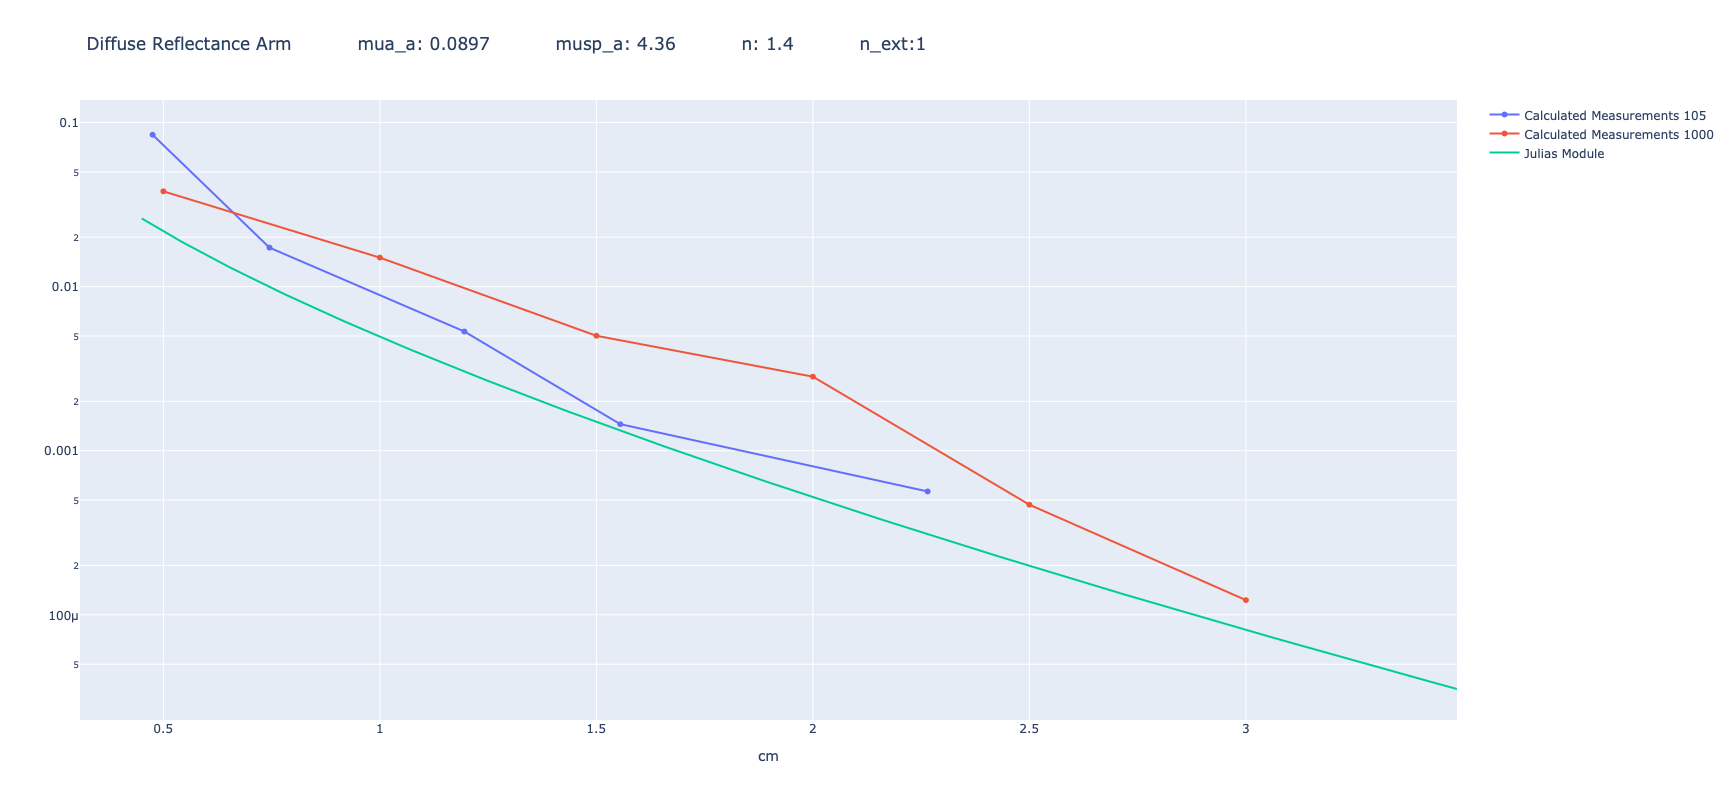

In [503]:
reflectance_a_small = go.Figure()
rho_small = np.arange(0.45,3.5,0.0125)

mua_a = 0.0897; musp_a = 4.36; n= 1.4; n_ext = 1;

diff_r_measurements_a_small = np.asarray([0.0841778255, 0.0172693058, 0.005325371976, 0.001451424911, 0.0005646661386, 0.0002008058814, 0.00007389656437])

result_a_s = model_ss(rho_small, mua_a, musp_a, n, n_ext)
result_a_s = np.abs(result_a_s)

reflectance_a_small.add_trace(go.Scatter(x = distance_, y = diff_r_measurements_a_small, name = 'Calculated Measurements 105 ',showlegend=True))
reflectance_a_small.add_trace(go.Scatter(x = distance_small_f, y = diff_r_measurements_a, name = 'Calculated Measurements 1000 ',showlegend=True))
reflectance_a_small.add_trace(go.Scatter(x = rho_small, y = (result_a_s/(2*np.pi)), name = 'Julias Module',showlegend=True))

reflectance_a_small.update_layout(autosize=False,width=1400,height=800,title = "Diffuse Reflectance Arm           mua_a: "+str(mua_a)+"           musp_a: "+str(musp_a)+"           n: "+str(n)+"           n_ext:"+str(n_ext) , yaxis_title= '', xaxis_title = 'cm')
reflectance_a_small.update_yaxes(type="log")
